# Simulator PV and unavaibility 

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.9.0
- Date : 10-08-2022 

In [24]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_solcast = '../../Data/Solcast_Data/'
file_path_func = '../../Functions/'

# system set paths 
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_solcast)
sys.path.append(file_path_func)

# functions
import functions as func
import Simulator_config as pv

# reload functions
import imp
imp.reload(pv)
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook


# html graphics
import bokeh as boken
from bokeh.plotting import figure, output_file, show
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums

#new library
from pvlib.pvsystem import FixedMount
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

# Index

 1. Simulation  
     1.1. Temperature model  
     1.2. Location  
     1.3. Module  
     1.4. Inverter  
     1.5. System  
     1.6. Model  
     1.7. Data Weather Solcast  
     1.8. Run model  
     1.9. Get hourly simulation  
     1.10. Graph Simulation
 2. Data real  
     2.1. Read pickle  
     2.2. Names pv  
     2.3. Data per hour  
     2.4. Unavaibility data  
     2.5. Graph Real Generation
 3. Graph Real Generation and Simulation per hour
 
 
 

## 1) Simulation

### 1.1) Temperature model

In [25]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
temperature_model_parameters

{'a': -3.47, 'b': -0.0594, 'deltaT': 3}

### 1.2)  Location

In [26]:
#Location
loc = Location(latitude=pv.Location['lat'],
               longitude=pv.Location['long'],
               tz=pv.Location['tz'],
               altitude=pv.Location['alt'])

### 1.3) Module

In [27]:
#module
module_340 = pd.Series(pv.TSM_TEG14,
                       name=pv.TSM_TEG14['Name'])

### 1.4) Inverter

In [28]:
#inverter
inverter_1600 = pd.Series(pv.INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_1600TL_U_B615_Indoor__450V_,
                            name=pv.INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_1600TL_U_B615_Indoor__450V_['Name'])

### 1.5) System

In [29]:
#System
system_A = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_B = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_C = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_D = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_E = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_F = PVSystem(module_parameters=module_340,
                    inverter_parameters=inverter_1600,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )


### 1.6) Model 

In [30]:
#model
mc_A = ModelChain(system_A, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_A")             # system_A

mc_B = ModelChain(system_B, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_B")             # system_B

mc_C = ModelChain(system_C, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_C")             # system_C

mc_D = ModelChain(system_D, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_D")             # system_A

mc_E = ModelChain(system_E, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_E")             # system_B

mc_F = ModelChain(system_F, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_F")             # system_C



### 1.7) Data Weather Solcast

In [31]:
# Weather Solcast
name_csv = '-33.5587_-70.87498_Solcast_PT60M.csv'
columns_test = ['PeriodEnd','PeriodStart','Period','dhi','dni','ghi']
solcast = func.weather_solcast_3(file_path_solcast+name_csv,columns_test,pr=True)
#weather_columns = ['ghi','dni','dhi','temp_air', 'wind_speed','ebh','azimuth','cloud_opacity','zenith','relative_humidity']
weather_columns = ['ghi','dni','dhi']
times, weather = func.get_times_weather(solcast,loc,weather_columns)

#para que conincidan los largos
#to-do: automatizacion/refactoring

#print(len(times[1175:-23]))
#print(times[1175:-23])

#print(len(weather[1175:-23]))
#print(weather[1075:-23])

#times = times[1175:-23]
#weather = weather[1175:-23]
weather.head(20)

                 PeriodEnd           PeriodStart Period  dhi   dni  ghi
0     2020-12-31T02:00:00Z  2020-12-31T01:00:00Z  PT60M    0     0    0
1     2020-12-31T03:00:00Z  2020-12-31T02:00:00Z  PT60M    0     0    0
2     2020-12-31T04:00:00Z  2020-12-31T03:00:00Z  PT60M    0     0    0
3     2020-12-31T05:00:00Z  2020-12-31T04:00:00Z  PT60M    0     0    0
4     2020-12-31T06:00:00Z  2020-12-31T05:00:00Z  PT60M    0     0    0
...                    ...                   ...    ...  ...   ...  ...
8801  2022-01-01T19:00:00Z  2022-01-01T18:00:00Z  PT60M   88  1000  992
8802  2022-01-01T20:00:00Z  2022-01-01T19:00:00Z  PT60M   84   969  853
8803  2022-01-01T21:00:00Z  2022-01-01T20:00:00Z  PT60M   75   916  666
8804  2022-01-01T22:00:00Z  2022-01-01T21:00:00Z  PT60M   63   824  449
8805  2022-01-01T23:00:00Z  2022-01-01T22:00:00Z  PT60M   46   661  228

[8806 rows x 6 columns]
primer dia 2020-12-31 01:00:00+00:00
ultimo dia 2022-01-01 22:00:00+00:00


,ghi,dni,dhi
date,,,
2020-12-31 01:00:00+00:00,0,0,0
2020-12-31 02:00:00+00:00,0,0,0
2020-12-31 03:00:00+00:00,0,0,0
2020-12-31 04:00:00+00:00,0,0,0
2020-12-31 05:00:00+00:00,0,0,0
2020-12-31 06:00:00+00:00,0,0,0
2020-12-31 07:00:00+00:00,0,0,0
2020-12-31 08:00:00+00:00,0,0,0
2020-12-31 09:00:00+00:00,5,10,5


### 1.8) Run model

In [32]:
mc_A.run_model(weather=weather)
mc_B.run_model(weather=weather)
mc_C.run_model(weather=weather)
mc_D.run_model(weather=weather)
mc_E.run_model(weather=weather)
mc_F.run_model(weather=weather)

ModelChain: 
  name: system_F
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: pvwatts_dc
  ac_model: pvwatts_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

 ### 1.9) Get hourly simulation

In [33]:
x_h ,y_h_a = func.get_hourly_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_h_b = func.get_hourly_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_h_c = func.get_hourly_axes_from_modelChain_object(mc_C, 'System_C')
_ ,y_h_d = func.get_hourly_axes_from_modelChain_object(mc_D, 'System_D')
_ ,y_h_e = func.get_hourly_axes_from_modelChain_object(mc_E, 'System_E')
_ ,y_h_f = func.get_hourly_axes_from_modelChain_object(mc_F, 'System_F')

y_h = [(a+b)/1000000 for a,b,c,d,e,f in zip(y_h_a,y_h_b,y_h_c,y_h_d,y_h_e,y_h_f)]

/home/nikolas/miniconda3/envs/ecr_solar/lib/python3.10/site-packages/pvlib/modelchain.py:507: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


 ### 1.10) Graph Simulation

<IPython.core.display.Javascript object>


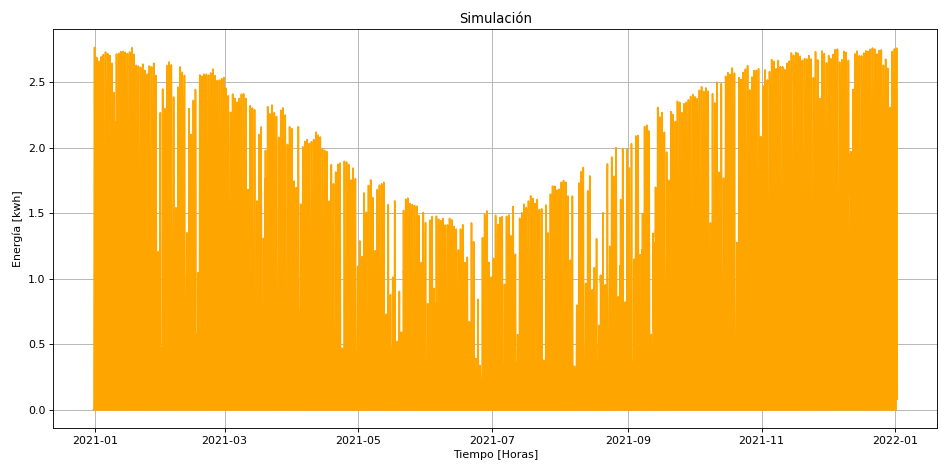

In [34]:
func.plot_1(x=x_h,
            y=y_h,
            size=(12,6),
            save='si',
            name_file='Simulation_hour',
            color='orange',
            title='Simulación',
            x_label='Tiempo [Horas]',
            y_label='Energía [kwh]')

## 2) Real data

### 2.1) Read pickle

In [35]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

- Tried to read file picke: ../../Data/Real_Generations_Data/Real_Generations.pickle
Pickle found in: ../../Data/Real_Generations_Data/Real_Generations.pickle
Returning data


In [36]:
#data_pickle

### 2.2) Names PV

In [37]:
# names to seach
names_pv = ['PMGD PFV EL GUANACO SOLAR',
            'PMGD PFV PUENTE SOLAR',
            'PMGD PFV CITRINO']

### 2.3) Data per hour

In [38]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      first_year=2021,
                                      last_year=2021,
                                      names_pv=names_pv,
                                      months=[1,2,3,4,5,6,7,8,9,10,11,12],
                                      p = True)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-01 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-01 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-01 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-01 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-01 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-01-01 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-01-01 06:0

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-08 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-08 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-08 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-08 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-08 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-01-08 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-01-08 06:00:00 value: 0.0048232234
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-01-08 07:00:00 value: 0.4391473484
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-01-08 08:00:00 value: 1.7104118957
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-01-08 09:00:00 value: 2.4572756958
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-01-15 15:00:00 value: 2.7390717773
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-01-15 16:00:00 value: 2.5547165527
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-01-15 17:00:00 value: 2.6723240356
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-01-15 18:00:00 value: 2.412102417
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-01-15 19:00:00 value: 1.2814700318
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-01-15 20:00:00 value: 0.1616165167
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-01-15 21:00:00 value: 1.88858e-05
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-15 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-15 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-16 00:00:00 value: 0.0
pv: PMGD PFV EL GUAN

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-22 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-23 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-23 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-23 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-23 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-23 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-01-23 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-01-23 06:00:00 value: 4.74524e-05
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-01-23 07:00:00 value: 0.0535386055
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-01-23 08:00:00 value: 0.2741075592
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 20

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-01-26 17:00:00 value: 2.6051323242
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-01-26 18:00:00 value: 2.3315651856
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-01-26 19:00:00 value: 1.1713031005
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-01-26 20:00:00 value: 0.13956031
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-01-26 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-26 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-26 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-27 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-27 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-27 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Ho

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-01-30 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-01-30 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-01-30 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-30 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-30 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-31 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-31 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-31 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-31 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-31 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-01-31 05:00:00 value

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-02-07 10:00:00 value: 0.442681778
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-02-07 11:00:00 value: 0.6739810639
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-02-07 12:00:00 value: 1.1998338775
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-02-07 13:00:00 value: 1.8781690064
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-02-07 14:00:00 value: 2.8204702758
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-02-07 15:00:00 value: 2.8329708252
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-02-07 16:00:00 value: 2.8010665283
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-02-07 17:00:00 value: 2.6924180909
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-02-07 18:00:00 value: 2.311909668
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-02-07 19:00:00 value: 1.026

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-02-14 18:00:00 value: 2.3915278626
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-02-14 19:00:00 value: 0.9993529281
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-02-14 20:00:00 value: 0.0434811968
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-02-14 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-02-14 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-02-14 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-02-15 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-02-15 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-02-15 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-02-15 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Dat

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-02-18 08:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-02-18 09:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-02-18 10:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-02-18 11:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-02-18 12:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-02-18 13:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-02-18 14:00:00 value: 2.4006873474
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-02-18 15:00:00 value: 2.6955772705
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-02-18 16:00:00 value: 2.6531073608
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-02-18 17:00:00 value: 2.5716328125
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-02-23 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-02-23 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-02-23 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-02-23 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-02-23 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-02-23 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-02-23 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-02-23 07:00:00 value: 0.0410870918
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-02-23 08:00:00 value: 0.9120970841
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-02-23 09:00:00 value: 2.2517966308
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-03-02 11:00:00 value: 2.4785980225
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-03-02 12:00:00 value: 2.5029744873
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-03-02 13:00:00 value: 2.4984655762
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-03-02 14:00:00 value: 2.5134934693
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-03-02 15:00:00 value: 2.5179047241
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-03-02 16:00:00 value: 2.4987495728
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-03-02 17:00:00 value: 2.4462728271
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-03-02 18:00:00 value: 1.9176629943
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-03-02 19:00:00 value: 0.5147061271
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-03-02 20:00:00 value: 0.0

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-03-05 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-03-06 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-03-06 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-03-06 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-03-06 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-03-06 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-03-06 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-03-06 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-03-06 07:00:00 value: 0.0090084015
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-03-06 08:00:00 value: 0.1450344105
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-06

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-03-10 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-03-10 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-03-10 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-03-10 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-03-10 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-03-10 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-03-10 07:00:00 value: 0.0038686996
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-03-10 08:00:00 value: 0.1468004351
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-10 09:00:00 value: 0.6415263825
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-03-10 10:00:00 value: 2.358958374
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-03-17 19:00:00 value: 0.1823585322
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-03-17 20:00:00 value: 6.3721e-05
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-03-17 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-03-17 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-03-17 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-03-18 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-03-18 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-03-18 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-03-18 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-03-18 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-03-1

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-21 09:00:00 value: 0.8147640533
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-03-21 10:00:00 value: 1.3532855377
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-03-21 11:00:00 value: 2.1620613708
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-03-21 12:00:00 value: 2.3672980346
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-03-21 13:00:00 value: 2.1350917359
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-03-21 14:00:00 value: 2.4408094483
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-03-21 15:00:00 value: 2.0152748718
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-03-21 16:00:00 value: 1.5388258972
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-03-21 17:00:00 value: 2.4353478393
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-03-21 18:00:00 value: 1.4

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-25 09:00:00 value: 0.1483164616
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-03-25 10:00:00 value: 0.221737339
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-03-25 11:00:00 value: 0.5608777312
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-03-25 12:00:00 value: 2.1345883788
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-03-25 13:00:00 value: 2.2615687866
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-03-25 14:00:00 value: 2.3741935425
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-03-25 15:00:00 value: 2.3852089234
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-03-25 16:00:00 value: 2.4305646973
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-03-25 17:00:00 value: 2.3127976685
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-03-25 18:00:00 value: 1.25

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-03-29 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-03-29 07:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-03-29 08:00:00 value: 0.0385180235
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-29 09:00:00 value: 0.1415843659
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-03-29 10:00:00 value: 0.2427532101
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-03-29 11:00:00 value: 0.7077433701
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-03-29 12:00:00 value: 2.1845072631
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-03-29 13:00:00 value: 2.2868010255
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-03-29 14:00:00 value: 2.3052678222
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-03-29 15:00:00 value: 2.3205683594
pv: PMGD PF

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-04-02 07:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-04-02 08:00:00 value: 0.057193688
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-04-02 09:00:00 value: 0.2666162186
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-04-02 10:00:00 value: 0.4888115692
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-04-02 11:00:00 value: 1.3672458802
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-04-02 12:00:00 value: 1.2614257508
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-04-02 13:00:00 value: 1.3985683899
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-04-02 14:00:00 value: 1.9916668092
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-04-02 15:00:00 value: 1.7641096496
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-04-02 16:00:00 value: 1.3160623474
pv

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-04-10 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-04-10 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-04-10 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-04-10 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-04-10 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-04-10 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-04-10 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-04-10 07:00:00 value: 0.1706262135
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-04-10 08:00:00 value: 1.3588697663
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-04-10 09:00:00 value: 2.0821158752
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-04-17 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-04-17 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-04-18 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-04-18 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-04-18 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-04-18 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-04-18 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-04-18 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-04-18 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-04-18 07:00:00 value: 1.00027e-05
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-04-18 08:00:00 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-04-26 07:00:00 value: 0.0918703598
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-04-26 08:00:00 value: 0.9768978272
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-04-26 09:00:00 value: 1.8349501037
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-04-26 10:00:00 value: 1.8525138244
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-04-26 11:00:00 value: 1.7912419128
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-04-26 12:00:00 value: 1.7839077149
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-04-26 13:00:00 value: 1.808075409
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-04-26 14:00:00 value: 1.8659991455
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-04-26 15:00:00 value: 1.8977366638
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-04-26 16:00:00 value: 1.3581

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-05-03 14:00:00 value: 1.7947151184
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-05-03 15:00:00 value: 1.6984659423
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-05-03 16:00:00 value: 0.764657196
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-05-03 17:00:00 value: 0.1113855028
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-05-03 18:00:00 value: 4.191e-05
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-05-03 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-05-03 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-05-03 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-05-03 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-05-03 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 202

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-05-07 17:00:00 value: 0.062218571
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-05-07 18:00:00 value: 0.0001548105
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-05-07 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-05-07 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-05-07 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-05-07 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-05-07 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-05-08 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-05-08 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-05-08 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-0

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-05-12 08:00:00 value: 0.7445046768
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-05-12 09:00:00 value: 1.6934167481
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-05-12 10:00:00 value: 1.8331477661
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-05-12 11:00:00 value: 1.7389735718
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-05-12 12:00:00 value: 1.677572876
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-05-12 13:00:00 value: 1.7298727722
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-05-12 14:00:00 value: 1.8078575134
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-05-12 15:00:00 value: 1.7841327209
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-05-12 16:00:00 value: 1.019606369
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-05-12 17:00:00 value: 0.1454

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-05-19 10:00:00 value: 0.3954650268
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-05-19 11:00:00 value: 0.4429297714
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-05-19 12:00:00 value: 0.5797797088
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-05-19 13:00:00 value: 0.9688435822
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-05-19 14:00:00 value: 0.8435462495
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-05-19 15:00:00 value: 0.3393520355
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-05-19 16:00:00 value: 0.2660402337
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-05-19 17:00:00 value: 0.0443224921
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-05-19 18:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-05-19 19:00:00 value: 0.0
pv: PMGD

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-05-27 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-05-27 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-05-27 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-05-27 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-05-27 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-05-27 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-05-27 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-05-27 07:00:00 value: 0.0093465955
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-05-27 08:00:00 value: 0.4921489258
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-05-27 09:00:00 value: 1.4817899474
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-06-02 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-06-03 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-06-03 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-03 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-06-03 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-06-03 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-06-03 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-06-03 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-06-03 07:00:00 value: 0.0065629026
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-06-03 08:00:00 value: 0.4108342209
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-06-03

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-06-10 18:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-06-10 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-06-10 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-06-10 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-06-10 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-06-10 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-06-11 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-06-11 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-11 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-06-11 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-06-11 04:00:00 valu

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-06-17 18:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-06-17 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-06-17 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-06-17 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-06-17 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-06-17 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-06-18 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-06-18 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-18 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-06-18 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-06-18 04:00:00 valu

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-25 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-06-25 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-06-25 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-06-25 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-06-25 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-06-25 07:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-06-25 08:00:00 value: 0.0273445554
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-06-25 09:00:00 value: 0.0534260999
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-06-25 10:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-06-25 11:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-06-

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-07-02 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-07-02 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-07-02 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-07-02 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-07-02 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-07-03 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-07-03 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-07-03 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-07-03 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-07-03 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-07-03 05:00:00 value

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-07-08 11:00:00 value: 1.5744864807
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-07-08 12:00:00 value: 1.5234285583
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-07-08 13:00:00 value: 1.562901001
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-07-08 14:00:00 value: 1.6296048889
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-07-08 15:00:00 value: 1.6145072937
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-07-08 16:00:00 value: 0.8882267914
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-07-08 17:00:00 value: 0.0943002533
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-07-08 18:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-07-08 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-07-08 20:00:00 value: 0.0
pv: PMGD PFV EL GU

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-07-15 13:00:00 value: 1.57023172
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-07-15 14:00:00 value: 1.6450899048
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-07-15 15:00:00 value: 1.6441171876
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-07-15 16:00:00 value: 0.9703712311
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-07-15 17:00:00 value: 0.1219234458
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-07-15 18:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-07-15 19:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-07-15 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-07-15 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-07-15 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-07-23 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-07-23 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-07-24 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-07-24 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-07-24 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-07-24 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-07-24 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-07-24 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-07-24 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-07-24 07:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-07-24 08:00:00 value: 0

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-07-31 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-07-31 07:00:00 value: 0.0105525577
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-07-31 08:00:00 value: 0.5151706352
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-07-31 09:00:00 value: 1.5065479126
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-07-31 10:00:00 value: 1.7602810059
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-07-31 11:00:00 value: 1.7257563171
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-07-31 12:00:00 value: 1.6846092529
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-07-31 13:00:00 value: 1.7223694764
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-07-31 14:00:00 value: 1.7936568298
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-07-31 15:00:00 value: 1.7225775146
pv

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-08-03 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-08-03 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-08-03 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-08-03 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-08-04 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-04 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-04 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-04 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-04 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-04 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-04 06:00:00 value:

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-08-07 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-08-07 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-08-08 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-08 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-08 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-08 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-08 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-08 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-08 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-08-08 07:00:00 value: 0.0199755561
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-08-08 08:00:00

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-08-15 09:00:00 value: 0.1805857869
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-08-15 10:00:00 value: 0.229648117
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-08-15 11:00:00 value: 0.4530938186
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-08-15 12:00:00 value: 0.7375570069
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-08-15 13:00:00 value: 0.8647651215
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-08-15 14:00:00 value: 0.5868932343
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-08-15 15:00:00 value: 0.3205747337
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-08-15 16:00:00 value: 0.0868498182
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-08-15 17:00:00 value: 0.0211295587
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-08-15 18:00:00 value: 0.0


pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-19 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-19 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-19 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-19 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-19 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-19 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-08-19 07:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-08-19 08:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-08-19 09:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-08-19 10:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-08-19 11:00:00 value: 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-08-23 09:00:00 value: 0.1671016255
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-08-23 10:00:00 value: 0.3624908867
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-08-23 11:00:00 value: 0.6545181732
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-08-23 12:00:00 value: 1.1183134307
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-08-23 13:00:00 value: 1.4963977051
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-08-23 14:00:00 value: 1.9889911499
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-08-23 15:00:00 value: 1.9638754272
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-08-23 16:00:00 value: 0.679794365
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-08-23 17:00:00 value: 0.1368586483
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-08-23 18:00:00 value: 0.01

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-31 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-31 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-31 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-31 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-08-31 07:00:00 value: 0.0129090698
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-08-31 08:00:00 value: 0.1095142088
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-08-31 09:00:00 value: 0.3475869522
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-08-31 10:00:00 value: 1.4375229644
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-08-31 11:00:00 value: 1.9517599182
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-08-31 12:00:00 value: 2.3001255493
pv: PMGD PFV EL GUANACO SOLAR ye

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-09-03 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-09-03 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-09-04 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-09-04 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-09-04 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-09-04 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-09-04 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-09-04 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-09-04 06:00:00 value: 0.0004094294
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-09-04 07:00:00 value: 0.219361803
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-09-04 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-09-08 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-09-08 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-09-08 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-09-08 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-09-08 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-09-08 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-09-08 07:00:00 value: 0.0017295069
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-09-08 08:00:00 value: 0.4514414425
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-09-08 09:00:00 value: 1.7883146973
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-09-08 10:00:00 value: 2.4369683837
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-09-16 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-09-16 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-09-16 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-09-16 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-09-16 07:00:00 value: 0.0084838101
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-09-16 08:00:00 value: 0.6365121537
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-09-16 09:00:00 value: 1.96191214
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-09-16 10:00:00 value: 2.4539498291
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-09-16 11:00:00 value: 2.5436917725
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-09-16 12:00:00 value: 2.56502771
pv: PMGD PFV EL GUANACO SOLAR year: 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-09-22 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-09-23 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-09-23 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-09-23 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-09-23 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-09-23 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-09-23 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-09-23 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-09-23 07:00:00 value: 0.0284318079
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-09-23 08:00:00 value: 0.8588885955
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-09-23

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-09-26 15:00:00 value: 2.5996045532
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-09-26 16:00:00 value: 2.5582556763
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-09-26 17:00:00 value: 2.2961238098
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-09-26 18:00:00 value: 1.1320517731
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-09-26 19:00:00 value: 0.0932931819
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-09-26 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-09-26 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-09-26 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-09-26 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-09-27 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-09-30 16:00:00 value: 2.608085327
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-09-30 17:00:00 value: 2.3319689941
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-09-30 18:00:00 value: 1.1965678406
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-09-30 19:00:00 value: 0.1155036087
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-09-30 20:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-09-30 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-09-30 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-09-30 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-10-01 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-10-01 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-10-08 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-10-08 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-10-08 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-10-09 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-10-09 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-10-09 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-10-09 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-10-09 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-10-09 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-10-09 06:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-10-09 07:00:00 value: 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-10-16 13:00:00 value: 2.8518227539
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-10-16 14:00:00 value: 2.8546992187
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-10-16 15:00:00 value: 2.8473216553
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-10-16 16:00:00 value: 2.7931975707
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-10-16 17:00:00 value: 2.6010546875
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-10-16 18:00:00 value: 1.5432421417
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-10-16 19:00:00 value: 0.2590946806
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-10-16 20:00:00 value: 9.78452e-05
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-10-16 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-10-16 22:00:00 value: 0.0
pv: PMGD 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-10-23 14:00:00 value: 2.8380994873
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-10-23 15:00:00 value: 2.8203494262
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-10-23 16:00:00 value: 2.7371623535
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-10-23 17:00:00 value: 2.5340316161
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-10-23 18:00:00 value: 1.548161377
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-10-23 19:00:00 value: 0.2999343061
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-10-23 20:00:00 value: 0.0009594989
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-10-23 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-10-23 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-10-23 23:00:00 value: 0.0
pv: PMGD PFV EL GU

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-10-31 14:00:00 value: 2.1579333191
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-10-31 15:00:00 value: 1.444105652
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-10-31 16:00:00 value: 1.1256152343
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-10-31 17:00:00 value: 0.5466284104
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-10-31 18:00:00 value: 0.3119322891
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-10-31 19:00:00 value: 0.1608546733
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-10-31 20:00:00 value: 0.0032312576
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-10-31 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-10-31 22:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-10-31 23:00:00 value: 0.0
pv: PMGD PFV EL GU

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-11-08 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-11-08 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-11-08 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-11-08 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-11-08 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-11-08 06:00:00 value: 0.0126321114
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-11-08 07:00:00 value: 0.6440190849
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-11-08 08:00:00 value: 1.8961211549
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-11-08 09:00:00 value: 2.4976687011
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-11-08 10:00:00 value: 2.689963562
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hou

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-11-15 11:00:00 value: 2.8746514281
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-11-15 12:00:00 value: 2.9030043945
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-11-15 13:00:00 value: 2.9156797485
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-11-15 14:00:00 value: 2.8971328125
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-11-15 15:00:00 value: 2.8732201538
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-11-15 16:00:00 value: 2.8005982667
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-11-15 17:00:00 value: 2.6182100829
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-11-15 18:00:00 value: 1.876164917
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-11-15 19:00:00 value: 0.5920495377
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-11-15 20:00:00 value: 0.01

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 24 Date: 2021-11-18 23:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-11-19 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-11-19 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-11-19 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-11-19 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-11-19 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-11-19 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-11-19 06:00:00 value: 0.0116009517
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-11-19 07:00:00 value: 0.170262638
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-11-19 08:00:00 value: 0.5207290649
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 20

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-11-23 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-11-23 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-11-23 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-11-23 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-11-23 06:00:00 value: 0.0235405047
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-11-23 07:00:00 value: 0.2032446709
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-11-23 08:00:00 value: 0.5907247619
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-11-23 09:00:00 value: 2.3875103759
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-11-23 10:00:00 value: 2.7502839965
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-11-23 11:00:00 value: 2.882744995
pv: PMGD PFV EL GUANACO SOLAR year

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-11-30 13:00:00 value: 2.9206549682
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-11-30 14:00:00 value: 2.8898707885
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-11-30 15:00:00 value: 2.8496434326
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-11-30 16:00:00 value: 2.7598085327
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-11-30 17:00:00 value: 2.5872628174
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-11-30 18:00:00 value: 2.0960283814
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-11-30 19:00:00 value: 0.819851593
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-11-30 20:00:00 value: 0.0490413613
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-11-30 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-11-30 22:00:00 value: 0.0
pv: PMGD 

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-12-04 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-12-04 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-12-04 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-12-04 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-04 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-04 06:00:00 value: 0.0354387901
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-04 07:00:00 value: 0.7256551743
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-04 08:00:00 value: 2.0041947326
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-04 09:00:00 value: 2.5092541504
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-12-04 10:00:00 value: 2.6737896729
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Ho

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-12-08 13:00:00 value: 2.8793395385
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-12-08 14:00:00 value: 2.8456338501
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 16 Date: 2021-12-08 15:00:00 value: 2.8066687622
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 17 Date: 2021-12-08 16:00:00 value: 2.7299337158
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 18 Date: 2021-12-08 17:00:00 value: 2.5567111816
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 19 Date: 2021-12-08 18:00:00 value: 2.1265125122
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 20 Date: 2021-12-08 19:00:00 value: 0.9121978608
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 21 Date: 2021-12-08 20:00:00 value: 0.0684052089
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 22 Date: 2021-12-08 21:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 23 Date: 2021-12-08 22:00:00 value: 0.0
pv: PMGD

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-16 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-16 06:00:00 value: 0.0263764089
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-16 07:00:00 value: 0.6556047211
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-16 08:00:00 value: 1.9351731568
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-16 09:00:00 value: 2.4836090697
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-12-16 10:00:00 value: 2.6486008911
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-12-16 11:00:00 value: 2.729802124
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 13 Date: 2021-12-16 12:00:00 value: 2.8288363037
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 14 Date: 2021-12-16 13:00:00 value: 2.816935852
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 15 Date: 2021-12-16 14:00:00 value: 2.8101530151
pv: P

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1 Date: 2021-12-20 00:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-12-20 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-12-20 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-12-20 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-12-20 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-20 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-20 06:00:00 value: 0.0229965867
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-20 07:00:00 value: 0.6444583588
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-20 08:00:00 value: 1.8985383607
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-20 09:00:00 value: 2.4360653687
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 1

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 2 Date: 2021-12-24 01:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-12-24 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-12-24 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-12-24 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-24 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-24 06:00:00 value: 0.0161392014
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-24 07:00:00 value: 0.542520771
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-24 08:00:00 value: 1.7375810547
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-24 09:00:00 value: 2.3398147583
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-12-24 10:00:00 value: 2.544260376
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour

pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 3 Date: 2021-12-31 02:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 4 Date: 2021-12-31 03:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 5 Date: 2021-12-31 04:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-31 05:00:00 value: 0.0
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-31 06:00:00 value: 0.009722624
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-31 07:00:00 value: 0.4979501229
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-31 08:00:00 value: 1.6792684326
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-31 09:00:00 value: 2.3088839112
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 11 Date: 2021-12-31 10:00:00 value: 2.4748127442
pv: PMGD PFV EL GUANACO SOLAR year: 2021 Hour: Hora 12 Date: 2021-12-31 11:00:00 value: 2.6326449586
pv: PMGD PFV EL GUANACO SOLAR year

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-05 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-06 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-06 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-06 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-06 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-06 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-01-06 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-01-06 06:00:00 value: 3.0745e-06
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-01-06 07:00:00 value: 0.0580136551
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-01-06 08:00:00 value: 0.4486407279
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-01-06 09:00:00 value: 2.2705479126
pv: PMG

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-01-09 17:00:00 value: 2.981689331
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-01-09 18:00:00 value: 2.8228101197
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-01-09 19:00:00 value: 1.6290098571
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-01-09 20:00:00 value: 0.3622000867
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-01-09 21:00:00 value: 0.004631195
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-09 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-09 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-10 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-10 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-10 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-10 03:00:00 valu

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-01-16 18:00:00 value: 2.4545211792
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-01-16 19:00:00 value: 1.6483914489
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-01-16 20:00:00 value: 0.3958940849
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-01-16 21:00:00 value: 0.005215517
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-16 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-16 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-17 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-17 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-17 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-17 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-17 04:00:00 value: 0.0
pv

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-20 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-01-20 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-01-21 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-01-21 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-01-21 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-01-21 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-01-21 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-01-21 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-01-21 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-01-21 07:00:00 value: 0.0722902254
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-01-21 08:00:00 value: 0.8357809372
pv: PMGD PFV PUENTE SOL

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-01-28 13:00:00 value: 2.2811444703
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-01-28 14:00:00 value: 2.1848348084
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-01-28 15:00:00 value: 1.5853833923
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-01-28 16:00:00 value: 1.1332684936
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-01-28 17:00:00 value: 1.0945693664
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-01-28 18:00:00 value: 0.8262433624
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-01-28 19:00:00 value: 0.3605025253
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-01-28 20:00:00 value: 0.1602094537
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-01-28 21:00:00 value: 0.0073658838
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-01-28 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Ho

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-02-01 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-02-01 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-02-01 07:00:00 value: 0.0018337351
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-02-01 08:00:00 value: 0.1270979594
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-02-01 09:00:00 value: 0.2181512833
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-02-01 10:00:00 value: 0.3057394943
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-02-01 11:00:00 value: 1.0037290955
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-02-01 12:00:00 value: 1.4825295105
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-02-01 13:00:00 value: 2.2734061584
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-02-01 14:00:00 value: 2.42637854
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Dat

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-02-04 20:00:00 value: 0.3914886303
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-02-04 21:00:00 value: 0.0030875511
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-02-04 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-02-04 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-02-05 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-02-05 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-02-05 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-02-05 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-02-05 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-02-05 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-02-05 06:00:00 value: 0.0
pv: PMGD PFV PUENTE S

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-02-08 12:00:00 value: 2.7797384033
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-02-08 13:00:00 value: 2.8119655763
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-02-08 14:00:00 value: 2.7961444702
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-02-08 15:00:00 value: 2.7506831055
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-02-08 16:00:00 value: 2.7161525268
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-02-08 17:00:00 value: 2.6513204955
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-02-08 18:00:00 value: 2.4751240844
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-02-08 19:00:00 value: 1.6364135437
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-02-08 20:00:00 value: 0.3476577987
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-02-08 21:00:00 value: 0.0019039142
pv: PMGD PFV PUENTE SOLAR year

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-02-15 09:00:00 value: 0.139333372
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-02-15 10:00:00 value: 0.3290993881
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-02-15 11:00:00 value: 0.5051605835
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-02-15 12:00:00 value: 1.2601996002
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-02-15 13:00:00 value: 2.2873151245
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-02-15 14:00:00 value: 2.7494360961
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-02-15 15:00:00 value: 2.7241882935
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-02-15 16:00:00 value: 2.7208425293
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-02-15 17:00:00 value: 2.6666587525
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-02-15 18:00:00 value: 2.3928901977
pv: PMGD PFV PUENTE SOLAR year:

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-02-22 13:00:00 value: 2.6247742309
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-02-22 14:00:00 value: 2.6042112427
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-02-22 15:00:00 value: 2.617532898
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-02-22 16:00:00 value: 2.6333369752
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-02-22 17:00:00 value: 2.6064360963
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-02-22 18:00:00 value: 2.4588675537
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-02-22 19:00:00 value: 1.5932694092
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-02-22 20:00:00 value: 0.2798259182
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-02-22 21:00:00 value: 0.0001725958
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-02-22 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hou

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-02-26 17:00:00 value: 2.5678289796
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-02-26 18:00:00 value: 2.3464095459
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-02-26 19:00:00 value: 1.3778693085
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-02-26 20:00:00 value: 0.2034299446
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-02-26 21:00:00 value: 7.061e-07
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-02-26 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-02-26 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-02-27 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-02-27 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-02-27 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-02-27 03:00:00 value

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-03-06 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-03-06 08:00:00 value: 0.0307558565
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-06 09:00:00 value: 0.2279420014
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-03-06 10:00:00 value: 0.9306845322
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-03-06 11:00:00 value: 2.2334993897
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-03-06 12:00:00 value: 2.4069499511
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-03-06 13:00:00 value: 2.4163007202
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-03-06 14:00:00 value: 2.4023483886
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-03-06 15:00:00 value: 2.3844979249
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-03-06 16:00:00 value: 2.3991447144
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-03-13 18:00:00 value: 2.0195653686
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-03-13 19:00:00 value: 0.9986145325
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-03-13 20:00:00 value: 0.0879545853
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-03-13 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-03-13 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-03-13 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-03-14 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-03-14 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-03-14 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-03-14 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-03-14 04:00:00 value: 0.0
pv: PMGD P

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-03-21 17:00:00 value: 1.9212808533
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-03-21 18:00:00 value: 2.0689885253
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-03-21 19:00:00 value: 1.0883392028
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-03-21 20:00:00 value: 0.0857484715
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-03-21 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-03-21 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-03-21 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-03-22 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-03-22 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-03-22 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-03-22 03:00:00 value: 0.0


pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-03-29 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-03-29 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-03-29 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-03-29 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-03-29 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-03-29 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-03-29 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-03-29 08:00:00 value: 0.0006979281
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-03-29 09:00:00 value: 0.0656761022
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-03-29 10:00:00 value: 0.1828753776
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-03-29 11:00:00 value: 0.3216461678
pv: 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-04-05 18:00:00 value: 0.6057514611
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-04-05 19:00:00 value: 0.0119753628
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-04-05 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-04-05 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-04-05 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-04-05 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-04-06 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-04-06 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-04-06 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-04-06 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-04-06 04:00:00 value: 0.0
pv: PMGD PFV PUENTE

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-04-09 15:00:00 value: 2.0420956116
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-04-09 16:00:00 value: 2.019362671
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-04-09 17:00:00 value: 1.5920462647
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-04-09 18:00:00 value: 0.5137663688
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-04-09 19:00:00 value: 0.0083286682
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-04-09 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-04-09 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-04-09 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-04-09 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-04-10 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-04-10 01:00:00 v

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-04-13 09:00:00 value: 1.2984763489
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-04-13 10:00:00 value: 1.9424231262
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-04-13 11:00:00 value: 1.9659093018
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-04-13 12:00:00 value: 1.9302966003
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-04-13 13:00:00 value: 1.922875885
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-04-13 14:00:00 value: 1.9398558349
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-04-13 15:00:00 value: 2.0049650269
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-04-13 16:00:00 value: 1.9911154175
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-04-13 17:00:00 value: 1.5528040467
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-04-13 18:00:00 value: 0.454440607
pv: PMGD PFV PUENTE SOLAR year: 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-04-20 12:00:00 value: 1.5559887695
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-04-20 13:00:00 value: 1.7879209596
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-04-20 14:00:00 value: 1.84106427
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-04-20 15:00:00 value: 1.8869123841
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-04-20 16:00:00 value: 1.8655465698
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-04-20 17:00:00 value: 1.3652399293
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-04-20 18:00:00 value: 0.2326712053
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-04-20 19:00:00 value: 7.68355e-05
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-04-20 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-04-20 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-04-27 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-04-27 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-04-27 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-04-28 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-04-28 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-04-28 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-04-28 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-04-28 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-04-28 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-04-28 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-04-28 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hou

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-05-05 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-05-05 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-05-05 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-05-05 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-05-06 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-05-06 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-05-06 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-05-06 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-05-06 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-05-06 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-05-06 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Ho

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-05-13 17:00:00 value: 0.1777994919
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-05-13 18:00:00 value: 0.0233830475
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-05-13 19:00:00 value: 0.0001656932
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-05-13 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-05-13 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-05-13 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-05-13 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-05-14 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-05-14 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-05-14 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-05-14 03:00:00 value: 0.0
pv: PMGD 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-05-21 07:00:00 value: 0.0066399687
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-05-21 08:00:00 value: 0.3555995522
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-05-21 09:00:00 value: 1.3316367188
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-05-21 10:00:00 value: 1.6137431641
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-05-21 11:00:00 value: 1.7309573059
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-05-21 12:00:00 value: 1.8111072998
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-05-21 13:00:00 value: 1.6491975861
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-05-21 14:00:00 value: 1.5395715332
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-05-21 15:00:00 value: 1.0940319366
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-05-21 16:00:00 value: 1.0124258422
pv: PMGD PFV PUENTE SOLAR year: 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-05-28 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-05-29 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-05-29 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-05-29 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-05-29 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-05-29 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-05-29 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-05-29 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-05-29 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-05-29 08:00:00 value: 0.0662705549
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-05-29 09:00:00 value: 0.1430126171
pv: PMGD PFV PUENTE SOL

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-06-01 17:00:00 value: 0.0373318914
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-06-01 18:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-06-01 19:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-06-01 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-06-01 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-06-01 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-06-01 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-06-02 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-06-02 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-02 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-06-02 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR y

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-06-05 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-06-05 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-06-05 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-06-05 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-06-06 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-06-06 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-06 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-06-06 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-06-06 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-06-06 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-06-06 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Ho

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-06-13 16:00:00 value: 0.8285807648
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-06-13 17:00:00 value: 0.0785136455
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-06-13 18:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-06-13 19:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-06-13 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-06-13 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-06-13 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-06-13 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-06-14 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-06-14 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-06-14 02:00:00 value: 0.0
pv: PMGD PFV PUEN

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-06-21 10:00:00 value: 1.433110199
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-06-21 11:00:00 value: 1.449321228
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-06-21 12:00:00 value: 1.3848825378
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-06-21 13:00:00 value: 1.3543661193
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-06-21 14:00:00 value: 0.3122029762
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-06-21 15:00:00 value: 0.7597729874
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-06-21 16:00:00 value: 0.2714226952
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-06-21 17:00:00 value: 0.0747119738
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-06-21 18:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-06-21 19:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-06-29 10:00:00 value: 1.3729638061
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-06-29 11:00:00 value: 1.4187696533
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-06-29 12:00:00 value: 1.4641961365
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-06-29 13:00:00 value: 1.505335846
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-06-29 14:00:00 value: 1.1308177033
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-06-29 15:00:00 value: 0.6196936645
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-06-29 16:00:00 value: 0.3455684509
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-06-29 17:00:00 value: 0.1117056121
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-06-29 18:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-06-29 19:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-07-07 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-07-07 08:00:00 value: 0.1086830608
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-07-07 09:00:00 value: 0.9269410248
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-07-07 10:00:00 value: 1.5834375
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-07-07 11:00:00 value: 1.5837338562
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-07-07 12:00:00 value: 1.5109518738
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-07-07 13:00:00 value: 1.4122485046
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-07-07 14:00:00 value: 1.5684949341
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-07-07 15:00:00 value: 1.622811493
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-07-07 16:00:00 value: 1.2592685394
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Ho

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-07-14 18:00:00 value: 0.0055070166
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-07-14 19:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-07-14 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-07-14 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-07-14 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-07-14 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-07-15 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-07-15 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-07-15 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-07-15 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-07-15 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR ye

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-07-22 08:00:00 value: 0.1064943094
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-07-22 09:00:00 value: 0.8710804138
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-07-22 10:00:00 value: 1.2085972901
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-07-22 11:00:00 value: 1.3736749267
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-07-22 12:00:00 value: 1.4075831299
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-07-22 13:00:00 value: 1.3167320862
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-07-22 14:00:00 value: 1.2468047791
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-07-22 15:00:00 value: 1.4054580382
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-07-22 16:00:00 value: 1.3438629456
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-07-22 17:00:00 value: 0.3963150082
pv: PMGD PFV PUENTE SOLAR year:

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-07-30 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-07-30 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-07-30 08:00:00 value: 0.0741045398
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-07-30 09:00:00 value: 0.0855942154
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-07-30 10:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-07-30 11:00:00 value: 0.3851705584
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-07-30 12:00:00 value: 1.6914837952
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-07-30 13:00:00 value: 1.6758426514
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-07-30 14:00:00 value: 1.71956781
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-07-30 15:00:00 value: 1.764161316
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-0

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-08-06 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-08-06 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-08-06 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-08-06 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-08-07 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-07 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-07 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-07 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-07 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-07 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-07 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Ho

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-08-10 18:00:00 value: 0.1130179474
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-08-10 19:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-08-10 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-08-10 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-08-10 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-08-10 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-08-11 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-11 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-11 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-11 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-11 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR ye

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-08-14 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-08-15 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-15 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-15 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-15 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-15 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-15 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-15 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-08-15 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-08-15 08:00:00 value: 0.0162310977
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-08-15 09:00:00 value: 0.0663820153
pv: PMGD PFV PUENTE SOL

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-08-22 10:00:00 value: 1.7521891175
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-08-22 11:00:00 value: 1.9732965698
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-08-22 12:00:00 value: 1.4493510132
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-08-22 13:00:00 value: 1.8995348511
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-08-22 14:00:00 value: 1.9596072388
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-08-22 15:00:00 value: 2.0729168701
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-08-22 16:00:00 value: 1.7687400207
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-08-22 17:00:00 value: 1.5943987427
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-08-22 18:00:00 value: 0.343762384
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-08-22 19:00:00 value: 0.0007533668
pv: PMGD PFV PUENTE SOLAR year:

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-08-30 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-08-30 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-08-30 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-08-30 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-08-30 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-08-30 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-08-30 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-08-30 07:00:00 value: 0.0151472023
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-08-30 08:00:00 value: 0.0701751995
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-08-30 09:00:00 value: 0.132353159
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-08-30 10:00:00 value: 0.2509470748
pv: PM

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-09-06 17:00:00 value: 1.8763553772
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-09-06 18:00:00 value: 0.5201884688
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-09-06 19:00:00 value: 0.031896981
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-09-06 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-09-06 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-09-06 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-09-06 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-09-07 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-09-07 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-09-07 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-09-07 03:00:00 value: 0.0
pv: PMGD P

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-09-14 13:00:00 value: 2.2693291626
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-09-14 14:00:00 value: 2.3170206299
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-09-14 15:00:00 value: 2.3691497193
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-09-14 16:00:00 value: 2.3774923096
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-09-14 17:00:00 value: 2.1018536988
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-09-14 18:00:00 value: 0.9798830033
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-09-14 19:00:00 value: 0.0558985348
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-09-14 20:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-09-14 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-09-14 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-09-22 09:00:00 value: 0.8407042923
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-09-22 10:00:00 value: 1.939087494
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-09-22 11:00:00 value: 2.185412201
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-09-22 12:00:00 value: 2.0432001648
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-09-22 13:00:00 value: 2.2907318726
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-09-22 14:00:00 value: 2.315725647
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-09-22 15:00:00 value: 2.3298657226
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-09-22 16:00:00 value: 2.2805388184
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-09-22 17:00:00 value: 2.0216964722
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-09-22 18:00:00 value: 0.9663814849
pv: PMGD PFV PUENTE SOLAR year: 2

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-09-30 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-09-30 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-09-30 07:00:00 value: 0.0602873696
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-09-30 08:00:00 value: 1.0183677215
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-09-30 09:00:00 value: 2.216717041
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-09-30 10:00:00 value: 2.477626831
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-09-30 11:00:00 value: 2.4814100952
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-09-30 12:00:00 value: 2.481725464
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-09-30 13:00:00 value: 2.467885254
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-09-30 14:00:00 value: 2.4344370117
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date:

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-10-08 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-10-08 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-10-08 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-10-08 07:00:00 value: 0.017997297
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-10-08 08:00:00 value: 0.2107666893
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-10-08 09:00:00 value: 0.1919916726
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-10-08 10:00:00 value: 0.4554929733
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-10-08 11:00:00 value: 1.4341282196
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-10-08 12:00:00 value: 1.3196018372
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-10-08 13:00:00 value: 1.3210475464
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-1

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-10-16 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-10-16 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-10-16 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-10-16 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-10-16 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-10-16 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-10-16 06:00:00 value: 0.0001984491
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-10-16 07:00:00 value: 0.2257384985
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-10-16 08:00:00 value: 1.4309869232
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-10-16 09:00:00 value: 2.3466498412
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-10-16 10:00:00 value: 2.5588613

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-10-23 12:00:00 value: 2.5962894287
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-10-23 13:00:00 value: 2.5728342896
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-10-23 14:00:00 value: 2.5517044067
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-10-23 15:00:00 value: 2.5783049927
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-10-23 16:00:00 value: 2.558305542
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-10-23 17:00:00 value: 2.3873865356
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-10-23 18:00:00 value: 1.5564920655
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-10-23 19:00:00 value: 0.2930804081
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-10-23 20:00:00 value: 0.0005898435
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-10-23 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hou

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-10-31 15:00:00 value: 1.3258227844
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-10-31 16:00:00 value: 1.0401537476
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-10-31 17:00:00 value: 0.5092997894
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-10-31 18:00:00 value: 0.2835150261
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-10-31 19:00:00 value: 0.1427691068
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-10-31 20:00:00 value: 0.0023429391
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-10-31 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-10-31 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-10-31 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-11-01 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-11-01 

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-11-08 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-11-08 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-11-08 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-11-08 06:00:00 value: 0.0102374996
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-11-08 07:00:00 value: 0.5281086921
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-11-08 08:00:00 value: 1.7515454712
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-11-08 09:00:00 value: 2.3557459717
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-11-08 10:00:00 value: 2.5179371947
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-11-08 11:00:00 value: 2.5512075195
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-11-08 12:00:00 value: 2.5785104369
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-1

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-11-16 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-11-16 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-11-16 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-11-16 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-11-16 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-11-16 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-11-16 06:00:00 value: 0.0162274888
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-11-16 07:00:00 value: 0.6194046287
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-11-16 08:00:00 value: 1.8800370178
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-11-16 09:00:00 value: 2.4326701049
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-11-16 10:00:00 value: 2.5724066

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-11-23 17:00:00 value: 2.4048405151
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-11-23 18:00:00 value: 1.8398562317
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-11-23 19:00:00 value: 0.6550279388
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-11-23 20:00:00 value: 0.0277350223
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-11-23 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-11-23 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-11-23 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 2021-11-24 00:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 2 Date: 2021-11-24 01:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-11-24 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-11-24 03:00:00 value: 0.0


pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-12-01 14:00:00 value: 2.5968474732
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-12-01 15:00:00 value: 2.5812874756
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-12-01 16:00:00 value: 2.535501831
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-12-01 17:00:00 value: 2.4298322144
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-12-01 18:00:00 value: 1.9787636718
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-12-01 19:00:00 value: 0.8329738617
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-12-01 20:00:00 value: 0.0541498208
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-12-01 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-12-01 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-12-01 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 20

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 3 Date: 2021-12-09 02:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 4 Date: 2021-12-09 03:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 5 Date: 2021-12-09 04:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-09 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-09 06:00:00 value: 0.0250263669
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-09 07:00:00 value: 0.6376404877
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-09 08:00:00 value: 1.7872006531
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-09 09:00:00 value: 2.2993410645
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-12-09 10:00:00 value: 2.4559989624
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-12-09 11:00:00 value: 2.5631959228
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-12-09 12:00

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 6 Date: 2021-12-17 05:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 7 Date: 2021-12-17 06:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 8 Date: 2021-12-17 07:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 9 Date: 2021-12-17 08:00:00 value: 0.1472832336
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 10 Date: 2021-12-17 09:00:00 value: 2.286401062
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 11 Date: 2021-12-17 10:00:00 value: 2.7293078003
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 12 Date: 2021-12-17 11:00:00 value: 2.7948111573
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 13 Date: 2021-12-17 12:00:00 value: 2.8210866089
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 14 Date: 2021-12-17 13:00:00 value: 2.8315717774
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-12-17 14:00:00 value: 2.7997939453
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-

pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 15 Date: 2021-12-24 14:00:00 value: 2.7442543335
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 16 Date: 2021-12-24 15:00:00 value: 2.7257946777
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 17 Date: 2021-12-24 16:00:00 value: 2.6507889405
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 18 Date: 2021-12-24 17:00:00 value: 2.5420084839
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 19 Date: 2021-12-24 18:00:00 value: 2.2341864929
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 20 Date: 2021-12-24 19:00:00 value: 1.180941986
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 21 Date: 2021-12-24 20:00:00 value: 0.1424697428
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 22 Date: 2021-12-24 21:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 23 Date: 2021-12-24 22:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 24 Date: 2021-12-24 23:00:00 value: 0.0
pv: PMGD PFV PUENTE SOLAR year: 2021 Hour: Hora 1 Date: 20

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-01-01 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-01-01 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-01-01 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-01-01 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-01-01 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-01-01 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-01-01 06:00:00 value: 0.0059029437
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-01-01 07:00:00 value: 0.4292061692
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-01-01 08:00:00 value: 1.5856063232
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-01-01 09:00:00 value: 2.1966290284
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-01-01 10:00:00 value: 2.3836472168
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date:

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-01-08 16:00:00 value: 2.4867074585
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-01-08 17:00:00 value: 2.4202810669
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-01-08 18:00:00 value: 1.6355014648
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-01-08 19:00:00 value: 1.0644714356
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-01-08 20:00:00 value: 0.1448968353
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-01-08 21:00:00 value: 1.33439e-05
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-01-08 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-01-08 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-01-09 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-01-09 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-01-09 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour:

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-01-16 13:00:00 value: 2.3556727295
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-01-16 14:00:00 value: 2.3510922851
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-01-16 15:00:00 value: 2.3436045533
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-01-16 16:00:00 value: 2.3366741943
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-01-16 17:00:00 value: 2.2889650268
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-01-16 18:00:00 value: 2.074765625
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-01-16 19:00:00 value: 1.052890213
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-01-16 20:00:00 value: 0.1384758817
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-01-16 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-01-16 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-01-16 23:00:00 value: 0.0
pv: PMGD PFV CITR

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-01-24 07:00:00 value: 0.150000104
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-01-24 08:00:00 value: 0.9404936981
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-01-24 09:00:00 value: 1.7364794312
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-01-24 10:00:00 value: 1.9870153809
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-01-24 11:00:00 value: 2.0802307739
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-01-24 12:00:00 value: 2.1003642579
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-01-24 13:00:00 value: 2.16446698
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-01-24 14:00:00 value: 2.1720426026
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-01-24 15:00:00 value: 2.162662964
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-01-24 16:00:00 value: 2.152070984
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-01-24 17:00:00 value: 2.075579

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-01-31 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-01-31 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-02-01 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-02-01 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-02-01 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-02-01 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-02-01 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-02-01 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-02-01 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-02-01 07:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-02-01 08:00:00 value: 0.0359135818
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-02-01 09:00:00 value: 0.208491

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-02-08 16:00:00 value: 2.5277116699
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-02-08 17:00:00 value: 2.4729411012
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-02-08 18:00:00 value: 2.1227614746
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-02-08 19:00:00 value: 0.8981575088
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-02-08 20:00:00 value: 0.0680664635
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-02-08 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-02-08 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-02-08 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-02-09 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-02-09 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-02-09 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-02-16 16:00:00 value: 0.2402138519
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-02-16 17:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-02-16 18:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-02-16 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-02-16 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-02-16 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-02-16 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-02-16 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-02-17 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-02-17 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-02-17 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-02-17 03:00:00 value: 0.0

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-02-24 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-02-24 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-02-24 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-02-24 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-02-24 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-02-24 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-02-24 07:00:00 value: 0.03340527
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-02-24 08:00:00 value: 0.8772933655
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-02-24 09:00:00 value: 2.099572113
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-02-24 10:00:00 value: 2.3699514771
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-02-24 11:00:00 value: 2.4701627197
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-03-03 14:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-03-03 15:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-03-03 16:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-03-03 17:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-03-03 18:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-03-03 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-03-03 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-03-03 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-03-03 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-03-03 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-03-04 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-03-04 01:00:00 value: 0.0
pv: PM

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-03-11 13:00:00 value: 1.1725517883
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-03-11 14:00:00 value: 1.8809139709
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-03-11 15:00:00 value: 2.2145255737
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-03-11 16:00:00 value: 1.6347427979
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-03-11 17:00:00 value: 1.6505770263
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-03-11 18:00:00 value: 0.6932781525
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-03-11 19:00:00 value: 0.06268418
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-03-11 20:00:00 value: 9.01846e-05
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-03-11 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-03-11 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-03-11 23:00:00 value: 0.0
pv: PMGD PFV CITRI

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-03-19 10:00:00 value: 0.7417226791
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-03-19 11:00:00 value: 0.7431701775
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-03-19 12:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-03-19 13:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-03-19 14:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-03-19 15:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-03-19 16:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-03-19 17:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-03-19 18:00:00 value: 0.219547102
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-03-19 19:00:00 value: 0.2429992151
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-03-19 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-03-27 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-03-27 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-03-27 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-03-27 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-03-27 07:00:00 value: 0.0007611596
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-03-27 08:00:00 value: 0.3865510207
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-03-27 09:00:00 value: 1.6307904664
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-03-27 10:00:00 value: 2.1133968506
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-03-27 11:00:00 value: 2.0815747071
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-03-27 12:00:00 value: 2.0109157104
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-03-27 13:00:00 value: 1.9558879394
pv: PMGD PFV CITRINO year: 202

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-04-04 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-04-04 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-04-04 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-04-04 06:00:00 value: 5.378e-07
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-04-04 07:00:00 value: 0.0978357887
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-04-04 08:00:00 value: 0.5485645142
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-04-04 09:00:00 value: 0.6337104187
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-04-04 10:00:00 value: 0.7464758301
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-04-04 11:00:00 value: 0.3004098358
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-04-04 12:00:00 value: 0.6861335296
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-04-04 13:00:00 value: 1.5636164247
pv: PMGD PFV CITRINO yea

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-04-12 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-04-12 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-04-12 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-04-12 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-04-12 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-04-12 07:00:00 value: 0.2209441161
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-04-12 08:00:00 value: 1.3356649933
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-04-12 09:00:00 value: 1.9501675721
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-04-12 10:00:00 value: 1.8977816773
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-04-12 11:00:00 value: 1.809236847
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-04-12 12:00:00 value: 1.7531425476
pv: PMGD PFV CITRINO year: 2021 Hour: Hor

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-04-19 18:00:00 value: 0.0041356725
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-04-19 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-04-19 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-04-19 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-04-19 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-04-19 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-04-20 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-04-20 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-04-20 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-04-20 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-04-20 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-04-20 05:00:00 value: 0.0
p

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-04-27 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-04-27 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-04-27 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-04-27 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-04-27 07:00:00 value: 0.0155825074
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-04-27 08:00:00 value: 0.1331999475
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-04-27 09:00:00 value: 0.2835479355
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-04-27 10:00:00 value: 0.4457812882
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-04-27 11:00:00 value: 1.2255665588
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-04-27 12:00:00 value: 1.7467987671
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-04-27 13:00:00 value: 1.7634895019
pv: PMGD PFV CITRINO year: 202

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-05-04 13:00:00 value: 0.9135722809
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-05-04 14:00:00 value: 0.7144473418
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-05-04 15:00:00 value: 0.5222690812
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-05-04 16:00:00 value: 0.3309625587
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-05-04 17:00:00 value: 0.1424087775
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-05-04 18:00:00 value: 0.000146414
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-05-04 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-05-04 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-05-04 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-05-04 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-05-04 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Ho

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-05-11 07:00:00 value: 0.0294445128
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-05-11 08:00:00 value: 0.701687046
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-05-11 09:00:00 value: 1.6455491334
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-05-11 10:00:00 value: 1.6951363525
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-05-11 11:00:00 value: 1.6108477783
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-05-11 12:00:00 value: 1.5473325806
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-05-11 13:00:00 value: 1.5945117493
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-05-11 14:00:00 value: 1.6736539917
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-05-11 15:00:00 value: 1.7263611755
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-05-11 16:00:00 value: 0.991808548
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-05-11 17:00:00 value: 0.123

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-05-17 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-05-17 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-05-17 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-05-17 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-05-17 07:00:00 value: 0.0254076932
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-05-17 08:00:00 value: 0.5346420174
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-05-17 09:00:00 value: 1.2404147949
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-05-17 10:00:00 value: 1.4517592163
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-05-17 11:00:00 value: 1.4756445923
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-05-17 12:00:00 value: 1.4280358887
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-05-17 13:00:00 value: 1.4468265076
pv: PMGD PFV CITRINO year: 202

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-05-24 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-05-24 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-05-24 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-05-24 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-05-24 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-05-24 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-05-24 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-05-24 07:00:00 value: 0.0109364491
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-05-24 08:00:00 value: 0.6339824753
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-05-24 09:00:00 value: 1.5795640563
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-05-24 10:00:00 value: 1.655468628
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-05-2

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-05-31 08:00:00 value: 0.1100482426
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-05-31 09:00:00 value: 1.0120565185
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-05-31 10:00:00 value: 1.1643350524
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-05-31 11:00:00 value: 1.3051943969
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-05-31 12:00:00 value: 1.3408869019
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-05-31 13:00:00 value: 1.4551925355
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-05-31 14:00:00 value: 1.294222824
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-05-31 15:00:00 value: 1.4262603454
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-05-31 16:00:00 value: 0.6989826736
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-05-31 17:00:00 value: 0.0418505346
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-05-31 18:00:00 value: 0.0

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-06-07 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-06-07 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-06-08 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-06-08 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-06-08 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-06-08 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-06-08 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-06-08 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-06-08 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-06-08 07:00:00 value: 0.0023750709
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-06-08 08:00:00 value: 0.3811987343
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-06-08 09:00:00 value:

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-06-14 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-06-14 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-06-14 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-06-14 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-06-14 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-06-15 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-06-15 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-06-15 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-06-15 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-06-15 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-06-15 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-06-15 06:00:00 value: 0.0
pv: PMGD PF

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-06-22 08:00:00 value: 0.1349464703
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-06-22 09:00:00 value: 0.7374748688
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-06-22 10:00:00 value: 0.982530716
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-06-22 11:00:00 value: 1.1836629639
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-06-22 12:00:00 value: 0.9704300995
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-06-22 13:00:00 value: 1.1097951508
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-06-22 14:00:00 value: 1.1930310059
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-06-22 15:00:00 value: 0.8890293122
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-06-22 16:00:00 value: 0.4581625824
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-06-22 17:00:00 value: 0.06934756
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-06-22 18:00:00 value: 0.0
p

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-06-30 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-06-30 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-06-30 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-06-30 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-06-30 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-06-30 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-06-30 07:00:00 value: 0.000556859
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-06-30 08:00:00 value: 0.1114657378
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-06-30 09:00:00 value: 0.3054614258
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-06-30 10:00:00 value: 0.4927581864
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-06-30 11:00:00 value: 0.6891358185
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date:

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-07-07 17:00:00 value: 0.1138268179
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-07-07 18:00:00 value: 1.5261e-05
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-07-07 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-07-07 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-07-07 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-07-07 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-07-07 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-07-08 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-07-08 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-07-08 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-07-08 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-07-08 04:00:00 valu

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-07-15 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-07-15 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-07-15 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-07-15 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-07-15 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-07-15 07:00:00 value: 0.002105234
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-07-15 08:00:00 value: 0.1998014403
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-07-15 09:00:00 value: 1.0246343231
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-07-15 10:00:00 value: 1.3978905944
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-07-15 11:00:00 value: 1.4502710876
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-07-15 12:00:00 value: 1.4260679016
pv: PMGD PFV CITRINO year: 2021 Hour: Hor

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-07-23 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-07-23 07:00:00 value: 0.0021955381
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-07-23 08:00:00 value: 0.2414031659
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-07-23 09:00:00 value: 1.1332911683
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-07-23 10:00:00 value: 1.4742772521
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-07-23 11:00:00 value: 1.4396678467
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-07-23 12:00:00 value: 1.4544761963
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-07-23 13:00:00 value: 1.5172138671
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-07-23 14:00:00 value: 1.5784110107
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-07-23 15:00:00 value: 1.6067526856
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-07-23 16:00:00 value: 1.0397891083


pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-07-30 16:00:00 value: 1.0390044251
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-07-30 17:00:00 value: 0.2026816716
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-07-30 18:00:00 value: 0.0007575885
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-07-30 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-07-30 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-07-30 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-07-30 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-07-30 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-07-31 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-07-31 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-07-31 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-07-31 0

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-08-07 13:00:00 value: 0.1264643307
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-08-07 14:00:00 value: 0.1754720535
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-08-07 15:00:00 value: 0.1484128627
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-08-07 16:00:00 value: 0.1140841446
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-08-07 17:00:00 value: 0.0379837847
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-08-07 18:00:00 value: 0.0002044005
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-08-07 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-08-07 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-08-07 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-08-07 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-08-07 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 H

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-08-15 17:00:00 value: 0.0219404268
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-08-15 18:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-08-15 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-08-15 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-08-15 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-08-15 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-08-15 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-08-16 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-08-16 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-08-16 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-08-16 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-08-16 04:00:00 value: 0.0


pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-08-23 15:00:00 value: 1.7966203003
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-08-23 16:00:00 value: 0.7813025513
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-08-23 17:00:00 value: 0.120424902
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-08-23 18:00:00 value: 0.009251115
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-08-23 19:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-08-23 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-08-23 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-08-23 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-08-23 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-08-24 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-08-24 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-08-31 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-08-31 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-08-31 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-08-31 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-09-01 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-09-01 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-09-01 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-09-01 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-09-01 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-09-01 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-09-01 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-09-01 07:00:00 value: 0.0645712279
pv:

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-09-08 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-09-08 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-09-08 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-09-08 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-09-08 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-09-08 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-09-08 07:00:00 value: 0.001021191
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-09-08 08:00:00 value: 0.3505205307
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-09-08 09:00:00 value: 1.7840020142
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-09-08 10:00:00 value: 2.243246521
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-09-08 11:00:00 value: 2.203581543
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-09-15 17:00:00 value: 2.0091817627
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-09-15 18:00:00 value: 0.8296430435
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-09-15 19:00:00 value: 0.0280861222
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-09-15 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-09-15 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-09-15 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-09-15 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-09-16 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-09-16 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-09-16 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-09-16 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-09-16 04

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-09-23 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-09-23 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-09-23 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-09-23 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-09-23 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-09-23 07:00:00 value: 0.0255822526
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-09-23 08:00:00 value: 0.8507685165
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-09-23 09:00:00 value: 2.067973938
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-09-23 10:00:00 value: 2.3156461182
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-09-23 11:00:00 value: 2.3050490722
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-09-23 12:00:00 value: 2.2440061036
pv: PMGD PFV CITRINO year: 2021 Hour: Hor

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-10-01 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-10-01 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-10-01 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-10-01 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-10-01 06:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-10-01 07:00:00 value: 0.0697716506
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-10-01 08:00:00 value: 1.1189186249
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-10-01 09:00:00 value: 2.2114499512
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-10-01 10:00:00 value: 2.3569004516
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-10-01 11:00:00 value: 2.3505024413
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-10-01 12:00:00 value: 2.2941585083
pv: PMGD PFV CITRINO year: 2021 Hour: Ho

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-10-09 13:00:00 value: 2.4029447632
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-10-09 14:00:00 value: 2.4158891601
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-10-09 15:00:00 value: 2.4310901489
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-10-09 16:00:00 value: 2.4016480103
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-10-09 17:00:00 value: 2.2334503479
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-10-09 18:00:00 value: 1.1133079071
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-10-09 19:00:00 value: 0.1302001713
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-10-09 20:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-10-09 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-10-09 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-10-09 23:00:00 value: 0.0
pv: PMGD PFV CITRINO yea

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-10-17 08:00:00 value: 1.578509079
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-10-17 09:00:00 value: 2.3300620727
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-10-17 10:00:00 value: 2.4363282471
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-10-17 11:00:00 value: 2.4248095093
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-10-17 12:00:00 value: 2.4132189331
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-10-17 13:00:00 value: 2.4217691651
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-10-17 14:00:00 value: 2.450246399
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-10-17 15:00:00 value: 2.5027335816
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-10-17 16:00:00 value: 2.4989371338
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-10-17 17:00:00 value: 2.3840328368
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-10-17 18:00:00 value: 1.37

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-10-24 08:00:00 value: 1.7333490295
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-10-24 09:00:00 value: 2.3569711915
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-10-24 10:00:00 value: 2.45685083
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-10-24 11:00:00 value: 2.4354003906
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-10-24 12:00:00 value: 2.4057182007
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-10-24 13:00:00 value: 2.3994902954
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-10-24 14:00:00 value: 2.4016531982
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-10-24 15:00:00 value: 2.3985944214
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-10-24 16:00:00 value: 2.4053652343
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-10-24 17:00:00 value: 2.2968519898
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-10-24 18:00:00 value: 0.74

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-10-31 16:00:00 value: 0.9474455566
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-10-31 17:00:00 value: 0.419800148
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-10-31 18:00:00 value: 0.2360233498
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-10-31 19:00:00 value: 0.1540404901
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-10-31 20:00:00 value: 0.0027945901
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-10-31 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-10-31 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-10-31 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-11-01 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-11-01 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-11-01 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 D

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-11-08 13:00:00 value: 2.4274208984
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-11-08 14:00:00 value: 2.4251405029
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-11-08 15:00:00 value: 2.4433094483
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-11-08 16:00:00 value: 2.4370446777
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-11-08 17:00:00 value: 2.3330141602
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-11-08 18:00:00 value: 1.6383839416
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-11-08 19:00:00 value: 0.4383704127
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-11-08 20:00:00 value: 0.0059178912
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-11-08 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-11-08 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-11-08 23:00:00 value: 0.0
pv: PMGD PFV CI

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-11-16 17:00:00 value: 2.4347316284
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-11-16 18:00:00 value: 1.916087799
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-11-16 19:00:00 value: 0.6277496681
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-11-16 20:00:00 value: 0.0101995729
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-11-16 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-11-16 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-11-16 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-11-17 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-11-17 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-11-17 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-11-17 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-11-24 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-11-24 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-11-24 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-11-24 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-11-24 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-11-24 06:00:00 value: 0.0026114466
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-11-24 07:00:00 value: 0.0634498977
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-11-24 08:00:00 value: 0.1308406029
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-11-24 09:00:00 value: 0.2197702255
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-11-24 10:00:00 value: 0.6283870545
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-11-24 11:00:00 value: 0.7697816315
pv: PMGD PFV CITRINO year: 2021 Hour: Hor

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 22 Date: 2021-12-01 21:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 23 Date: 2021-12-01 22:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-12-01 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-12-02 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-12-02 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-12-02 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-12-02 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-12-02 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-12-02 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-12-02 06:00:00 value: 0.0329261383
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-12-02 07:00:00 value: 0.7641938401
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-12-02 08:00:00 value:

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-12-09 10:00:00 value: 2.3686374512
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-12-09 11:00:00 value: 2.5081771241
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 13 Date: 2021-12-09 12:00:00 value: 2.5620321044
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 14 Date: 2021-12-09 13:00:00 value: 2.5284231567
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 15 Date: 2021-12-09 14:00:00 value: 2.5068568726
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 16 Date: 2021-12-09 15:00:00 value: 2.4938358154
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 17 Date: 2021-12-09 16:00:00 value: 2.442321167
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 18 Date: 2021-12-09 17:00:00 value: 2.3520692139
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 19 Date: 2021-12-09 18:00:00 value: 2.0177029419
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 20 Date: 2021-12-09 19:00:00 value: 0.852141243
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 21 Date: 2021-12-09 20:00:00 value: 0.0

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-12-17 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-12-17 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-12-17 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-12-17 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-12-17 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-12-17 06:00:00 value: 0.0234540861
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-12-17 07:00:00 value: 0.6706225051
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-12-17 08:00:00 value: 1.8227878113
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-12-17 09:00:00 value: 2.2795684814
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-12-17 10:00:00 value: 2.3907953492
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 12 Date: 2021-12-17 11:00:00 value: 2.4151958008
pv: PMGD PFV CITRINO year: 2021 Hour: Hor

pv: PMGD PFV CITRINO year: 2021 Hour: Hora 24 Date: 2021-12-24 23:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 1 Date: 2021-12-25 00:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 2 Date: 2021-12-25 01:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 3 Date: 2021-12-25 02:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 4 Date: 2021-12-25 03:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 5 Date: 2021-12-25 04:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 6 Date: 2021-12-25 05:00:00 value: 0.0
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 7 Date: 2021-12-25 06:00:00 value: 0.0173693629
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 8 Date: 2021-12-25 07:00:00 value: 0.4755876084
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 9 Date: 2021-12-25 08:00:00 value: 1.671868103
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 10 Date: 2021-12-25 09:00:00 value: 2.1443637085
pv: PMGD PFV CITRINO year: 2021 Hour: Hora 11 Date: 2021-12-2

### 2.4) Unavaibility data

In [39]:
umbral = 0
registro, indisp_total = func.indisponibilidad(data=data_hours,
                                               r_start=9,
                                               r_end=18,
                                               umbral=umbral,
                                               print_=False)

/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:801: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  indisp_total[pl][f+f.freq*1] = data[pl][f+f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:802: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  r[pl][f.date()][f.hour+1] = data[pl][f+f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:803: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  indisp_total[pl][f-f.freq*1] = data[pl][f-f.freq*1]
/mnt/c/Users/nikol/OneDrive/Escritorio/ecr_solar/ecr_simulator/Simulators/07_Simulator_unavailability/../../Functions/functions.py:804: FutureWarning: Timestamp.freq is deprecate

### 2.5) Graph Real Generation

<IPython.core.display.Javascript object>


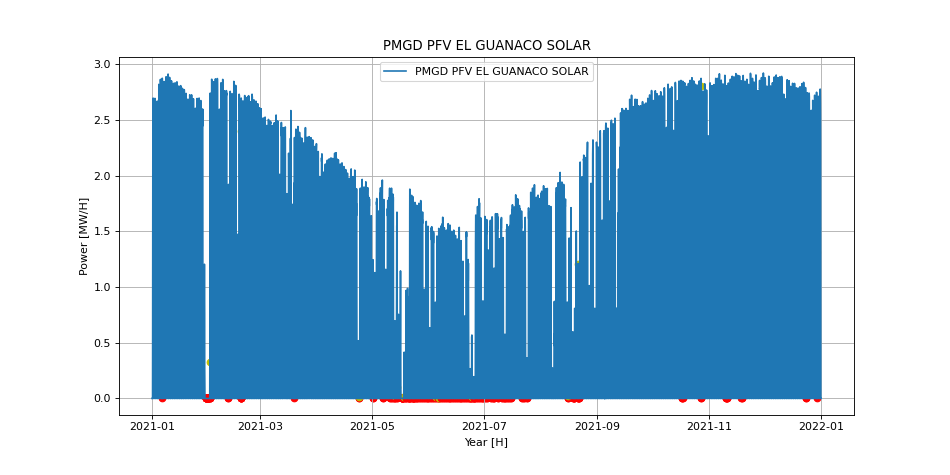

PMGD PFV EL GUANACO SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


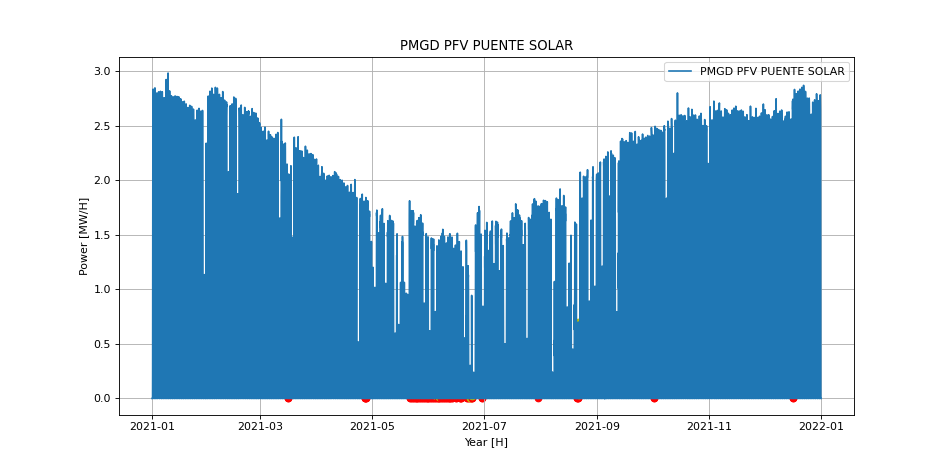

PMGD PFV PUENTE SOLAR len: 8760
x 8760
y 8760


<IPython.core.display.Javascript object>


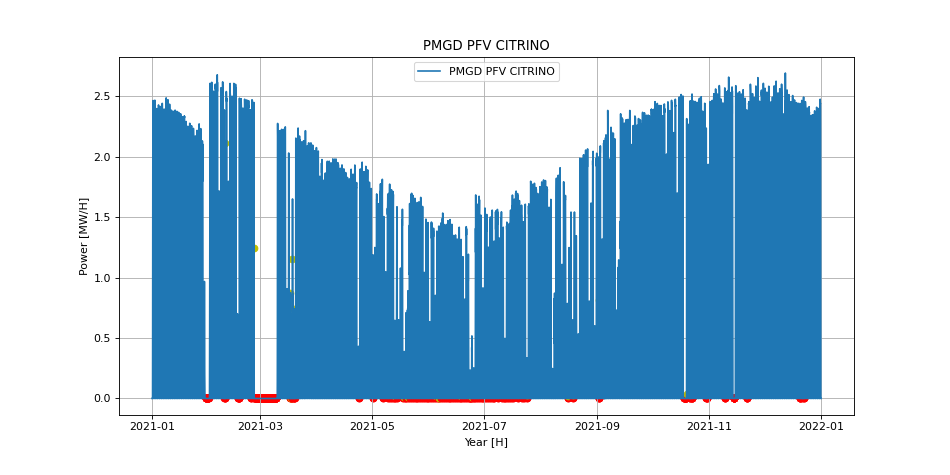

PMGD PFV CITRINO len: 8760
x 8760
y 8760


In [40]:
func.graph2(data=data_hours,
       x_label= 'Year [H]',
       y_label='Power [MW/H]',
       name='hour',
       indisp=indisp_total,
       umbral = umbral,
       size=40,
       dark=False)

## 3) Graph Real Generation and Simulation per hour

long axis x = 8760


<IPython.core.display.Javascript object>


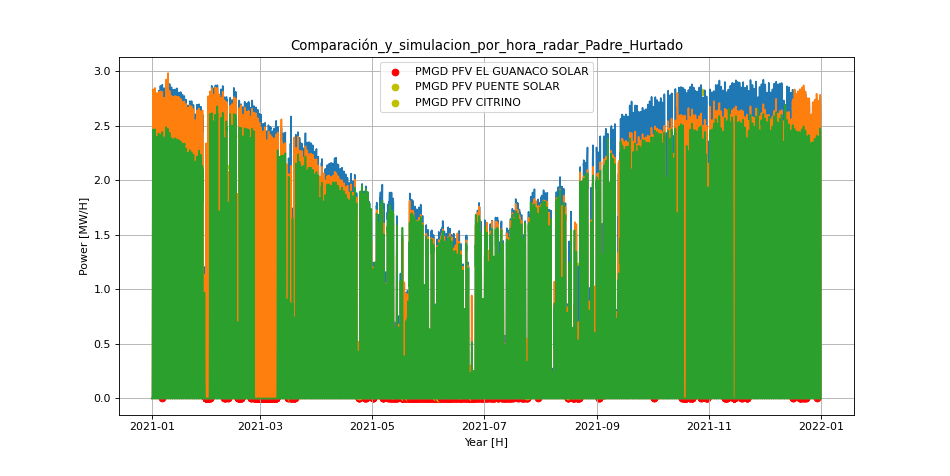

In [41]:
# colores:
# https://docs.bokeh.org/en/latest/docs/reference/colors.html
func.multi_graph_png_html3(data=data_hours,
                           x_sim=x_h,
                           y_sim=y_h,
                           x_label='Year [H]',
                           y_label='Power [MW/H]',
                           name='Comparación_y_simulacion_por_hora_radar_Padre_Hurtado',
                           colors=['cornflowerblue','darkorange','green','purple','olive'],
                           indisp=indisp_total,
                           umbral=umbral,
                           size=40,
                           dark=True)

# Found inverter or module

In [42]:
#textos_modulos = ['JA','320',''] # tienen que ser 3 textos
#textos_inversores = ['','',''] # tiene que ser 3 textos
#c = func.buscador(textos_inversores,textos_modulos)

#for a in c:
#    print(a,":\n")
#    for i in c[a]:
#        print(i)

In [43]:
#data_h = data_hours[names_pv[1]].values()
#data_h = [float(x) for x in data_h]